# Approach
- activity recognition
- sharpness classification
- outputs whether knife needs sharpening

In [1]:
import pandas as pd
import os
import re
import openpyxl

In [2]:
print(os.getcwd())

/Users/notvisal/Desktop/InternProj/knife_sharpness


In [3]:
P1_contents = os.listdir('Theme2/P1/Boning/')

print(P1_contents)

['MVN-J-Boning-79-001.xlsx', 'MVN-J-Boning-64-001.xlsx', 'MVN-J-Boning-64-006.xlsx', 'MVN-J-Boning-90-001.xlsx', 'MVN-J-Boning-64-004.xlsx', 'MVN-J-Boning-90-002.xlsx', 'MVN-J-Boning-90-003.xlsx', 'MVN-J-Boning-64-005.xlsx', 'MVN-J-Boning-90-004.xlsx', 'MVN-J-Boning-64-002.xlsx', 'MVN-J-Boning-64-003.xlsx']


In [4]:
P1_BONING_PATHS = [
    'Theme2/P1/Boning/MVN-J-Boning-64-001.xlsx', 
    'Theme2/P1/Boning/MVN-J-Boning-90-003.xlsx', 
    'Theme2/P1/Boning/MVN-J-Boning-90-002.xlsx', 
    'Theme2/P1/Boning/MVN-J-Boning-90-004.xlsx', 
    'Theme2/P1/Boning/MVN-J-Boning-64-006.xlsx', 
    'Theme2/P1/Boning/MVN-J-Boning-64-004.xlsx', 
    'Theme2/P1/Boning/MVN-J-Boning-64-002.xlsx', 
    'Theme2/P1/Boning/MVN-J-Boning-90-001.xlsx', 
    'Theme2/P1/Boning/MVN-J-Boning-64-003.xlsx', 
    'Theme2/P1/Boning/MVN-J-Boning-79-001.xlsx', 
    'Theme2/P1/Boning/MVN-J-Boning-64-005.xlsx'
]

ACCELERATION_SHEETS = [
    'Segment Acceleration', 
    'Segment Angular Acceleration'
]

ACTIVITY_LABELS = {
    0: 'Idle',
    1: 'Walking', 
    2: 'Steeling',
    3: 'Reaching',
    4: 'Cutting',
    5: 'Dropping'
}

In [5]:
xls_file = pd.ExcelFile(P1_BONING_PATHS[1])

print(xls_file.sheet_names)

df = xls_file.parse('Markers')
df.head(10)

['General Information', 'Markers', 'Segment Orientation - Quat', 'Segment Orientation - Euler', 'Segment Position', 'Segment Velocity', 'Segment Acceleration', 'Segment Angular Velocity', 'Segment Angular Acceleration', 'Joint Angles ZXY', 'Joint Angles XZY', 'Ergonomic Joint Angles ZXY', 'Ergonomic Joint Angles XZY', 'Center of Mass', 'Sensor Free Acceleration', 'Sensor Magnetic Field', 'Sensor Orientation - Quat', 'Sensor Orientation - Euler']


,Frame,Labelling,Unnamed: 2,Unnamed: 3
0,0- 252,0- Idle,Idle,0.0
1,253-417,3- Reaching,Walking,1.0
2,418-1849,4 - Cutting,Steeling,2.0
3,1851-1923,4 - Cutting (offloading bone from Carcass),Reaching,3.0
4,1924-2061,5- Dropping,Cutting,4.0
5,2062-2373,1- Walking,Dropping,5.0
6,2374-2764,2- Steeling,NaN,NaN
7,2765-2875,3- Reaching,NaN,NaN
8,2876-4153,4 - Cutting,NaN,NaN
9,4154-4231,4 - Cutting (offloading bone from Carcass),NaN,NaN


In [6]:
len(df.columns.tolist())

4

In [7]:
# for file in P1_BONING_PATHS:
#     xl = pd.ExcelFile(file)
#     for sheet in ACCELERATION_SHEETS:
#         df = xl.parse(sheet)
#         col = df.columns.tolist()

#         if 'Label' in col:
#             # print(f"{file} {sheet} have label col")
#             continue
#         else:
#             print(f"{file} {sheet} missing label column")
        
#         # print(f"{file}, {sheet}: {df['Label'].isna()}")
    

In [8]:
xl = pd.ExcelFile(P1_BONING_PATHS[1])
df = xl.parse(ACCELERATION_SHEETS[1])

df.head()

,Frame,Label,Pelvis x,Pelvis y,Pelvis z,L5 x,L5 y,L5 z,L3 x,L3 y,...,Left Upper Leg z,Left Lower Leg x,Left Lower Leg y,Left Lower Leg z,Left Foot x,Left Foot y,Left Foot z,Left Toe x,Left Toe y,Left Toe z
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,0,-1.128749,0.648902,-2.487596,-0.831204,-0.143373,-1.906267,-0.698962,-0.495496,...,-11.281005,0.396790,0.666104,-5.092240,-1.042992,0.438947,-0.256636,-1.042992,0.438947,-0.256636
2,2,0,-0.851040,-0.271079,-1.995743,1.088875,-3.353729,0.853952,1.951060,-4.723795,...,-8.101156,1.039803,1.298700,-2.361782,0.458836,0.217325,-0.207346,0.458836,0.217325,-0.207346
3,3,0,-0.588176,-0.134299,-1.295867,0.000000,0.000000,0.000000,0.000000,0.000000,...,-7.141263,0.552980,1.877903,-3.138768,0.248751,0.682828,0.745742,0.000000,0.000000,0.000000
4,4,0,-0.388814,-2.045831,0.103972,-0.715251,-1.160902,-2.188929,-0.860335,-0.767600,...,-8.961113,1.923597,1.152811,0.873384,-0.760524,-0.201851,0.395706,-0.760525,-0.201851,0.395706


In [9]:
# removing the boning 90 003's segment acceleration sheet, since it's missing a column
# or. inject the segment angular acceleration's label column into the segment acceleration sheet


# **Merging**

In [10]:
# from collections import defaultdict

# sharpness_levels = [64, 79, 90]

# def process_acceleration_data(file_paths, sharpness_levels):
#     """Process acceleration data from multiple Excel files with different sharpness levels."""
#     # Dictionary to store processed data by sheet type
#     sheet_data = defaultdict(list)
    
#     # Process all files and extract data by sheet type
#     for file_path, sharpness in zip(file_paths, sharpness_levels):
#         try:
#             xls = pd.ExcelFile(file_path)
            
#             for sheet_name in xls.sheet_names:
#                 if sheet_name not in ACCELERATION_SHEETS:
#                     continue
                
#                 try:
#                     # Read the sheet
#                     df = pd.read_excel(xls, sheet_name=sheet_name)
#                     print(f"{df.shape}")
                    
#                     if df.empty:
#                         continue

#                     if 'Label' not in df.columns:
#                         print(f"Skipping {sheet_name} since it doesn't have a label column")
#                         continue
                    
#                     # Add sharpness column
#                     df['sharpness'] = sharpness
                    
#                     # Add sheet name as a column to differentiate data source
#                     df['sheet_type'] = sheet_name
                    
#                     # Add to our collection
#                     sheet_data[sheet_name].append(df)
                
#                 except Exception as e:
#                     print(f"Error processing sheet {file_path} {sheet_name}: {e}")
        
#         except Exception as e:
#             print(f"Error processing file {file_path}: {e}")
    
#     # Combine data from all files
#     combined_dfs = []
    
#     for sheet_name, dfs in sheet_data.items():
#         if dfs:
#             # Concatenate all data for this sheet type
#             sheet_combined_df = pd.concat(dfs, ignore_index=True)
#             combined_dfs.append(sheet_combined_df)
    
#     # Return combined data frame
#     if combined_dfs:
#         final_df = pd.concat(combined_dfs, ignore_index=True)
#         return final_df
    
#     return None

# def main():
#     # Process the data
#     merged_df = process_acceleration_data(
#         file_paths=P1_BONING_PATHS,
#         sharpness_levels=sharpness_levels
#     )
    
#     if merged_df is None or merged_df.empty:
#         print("No results generated!")
#         return
    
#     # Save the final merged dataframe
#     output_file = "acceleration_data.csv"
#     merged_df.to_csv(output_file, index=False)
#     print(f"Saved data to {output_file} ({merged_df.shape[0]} rows, {merged_df.shape[1]} columns)")

# if __name__ == "__main__":
#     main()

In [11]:
df = pd.read_csv('acceleration_data.csv')

df.head()

,Frame,Label,Pelvis x,Pelvis y,Pelvis z,L5 x,L5 y,L5 z,L3 x,L3 y,...,Left Lower Leg y,Left Lower Leg z,Left Foot x,Left Foot y,Left Foot z,Left Toe x,Left Toe y,Left Toe z,sharpness,sheet_type
0,0,4,0.0,0.0,0.0,-1.640562,-0.345798,-0.666146,-2.369700,-0.499486,...,-2.060481,-1.485525,-2.185359,-1.194785,-1.663235,-2.185359,-1.194785,-1.663235,64,Segment Acceleration
1,1,4,0.0,0.0,0.0,-0.705326,-0.629461,-0.983502,-1.043948,-0.907626,...,-2.689504,-1.314239,-1.060466,-1.162565,-1.845591,-1.064713,-1.147108,-1.845636,64,Segment Acceleration
2,2,4,0.0,0.0,0.0,-1.146854,-0.839369,-0.862127,-1.683033,-1.219342,...,-2.178955,-1.321744,-0.220440,-1.530509,-1.658241,-0.227187,-1.514522,-1.657987,64,Segment Acceleration
3,3,4,0.0,0.0,0.0,-0.065640,-0.431009,-0.488192,-0.426137,-0.574987,...,-0.951495,-1.324380,-0.175790,-1.007643,-1.326566,-0.091278,-0.986575,-1.316862,64,Segment Acceleration
4,4,4,0.0,0.0,0.0,0.652927,-0.046127,0.174043,0.920047,-0.080622,...,-0.402592,-0.509365,0.347853,-0.509991,-0.538392,0.335083,-0.493518,-0.537629,64,Segment Acceleration


In [12]:
df.shape

(67354, 73)

# **Visualization**

In [13]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style for plotting
sns.set(style="whitegrid")

# Define the activity label mapping
ACTIVITY_LABELS = {
    0: 'Idle',
    1: 'Walking', 
    2: 'Steeling',
    3: 'Reaching',
    4: 'Cutting',
    5: 'Dropping'
}

def downsample_data(df, column_name, downsample_factor=10):
    """
    Downsample data to reduce density in visualization
    
    Parameters:
    - df: DataFrame to downsample
    - column_name: Column to use for grouping (usually the time or index column)
    - downsample_factor: Number of samples to combine into one
    
    Returns:
    - Downsampled DataFrame
    """
    # Create a group identifier
    df['group'] = np.floor(np.arange(len(df)) / downsample_factor).astype(int)
    
    # Group by the identifier and calculate means
    # Also keep the activity code and sharpness values (use mode/most common value)
    grouped = df.groupby(['group', 'sharpness', 'activity_code']).agg({
        value_column: 'mean',
        'Label': 'first'  # Keep the original label
    }).reset_index()
    
    return grouped

def create_facet_plots(df, time_column=None, value_column='Right Hand x', downsample_factor=None):
    """
    Create faceted plots separated by sharpness to improve readability.
    
    Parameters:
    - df: The merged DataFrame containing the acceleration data
    - time_column: The column name containing time/sequence information (optional)
    - value_column: The column containing the acceleration values to plot
    - downsample_factor: Factor by which to downsample data (e.g., 10 means take every 10th point)
    """
    # Make a copy of the dataframe to avoid modifying the original
    plot_df = df.copy()
    
    # Get activity label codes
    try:
        # Try to extract activity codes from 'Label'
        plot_df['activity_code'] = plot_df['Label'].apply(lambda x: float(str(x).split('.')[-1]) 
                                           if isinstance(x, str) and '.' in str(x) 
                                           else int(float(x)) if str(x).replace('.', '').isdigit() 
                                           else x)
    except KeyError:
        # If 'Label' doesn't exist, create a placeholder
        print("Warning: 'Label' column not found. Please verify your column names.")
        plot_df['activity_code'] = 0  # Default to the first activity
    
    # Map numerical codes to activity names
    plot_df['activity_name'] = plot_df['activity_code'].map(lambda x: ACTIVITY_LABELS.get(int(x), f"Activity {x}"))
    
    # Get unique sharpness levels
    sharpness_levels = sorted(plot_df['sharpness'].unique())
    
    # Create a figure with a subplot for each sharpness level
    fig, axes = plt.subplots(len(sharpness_levels), 1, figsize=(15, 5*len(sharpness_levels)), sharex=True)
    
    # If there's only one sharpness level, axes won't be an array
    if len(sharpness_levels) == 1:
        axes = [axes]
    
    # Create a color palette for activity labels
    activity_names = list(ACTIVITY_LABELS.values())
    activity_palette = sns.color_palette("Set1", len(activity_names))
    activity_colors = {name: color for name, color in zip(activity_names, activity_palette)}
    
    # Plot each sharpness level in its own subplot
    for i, sharpness in enumerate(sharpness_levels):
        ax = axes[i]
        sharpness_data = plot_df[plot_df['sharpness'] == sharpness]
        
        for activity_code, activity_name in ACTIVITY_LABELS.items():
            label_data = sharpness_data[sharpness_data['activity_code'] == activity_code]
            
            if not label_data.empty:
                # If downsampling is requested
                if downsample_factor and downsample_factor > 1:
                    # Downsample by taking every Nth point
                    label_data = label_data.iloc[::downsample_factor].copy()
                
                # If no time column is provided, use the index or create a sequence
                if time_column is None or time_column not in label_data.columns:
                    x_values = np.arange(len(label_data))
                else:
                    # Sort by time column
                    label_data = label_data.sort_values(by=time_column)
                    x_values = label_data[time_column]
                
                # Plot the data
                ax.plot(
                    x_values,
                    label_data[value_column],
                    label=activity_name,
                    color=activity_colors[activity_name],
                    linewidth=2,
                    alpha=0.8
                )
        
        # Set titles and labels
        ax.set_title(f'Sharpness Level: {sharpness}', fontsize=16)
        ax.set_ylabel(value_column, fontsize=12)
        ax.grid(True, linestyle='--', alpha=0.7)
        ax.legend(loc='upper right')
    
    # Set the bottom x-axis label
    if time_column and time_column in plot_df.columns:
        axes[-1].set_xlabel(time_column, fontsize=12)
    else:
        axes[-1].set_xlabel('Sample Index', fontsize=12)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

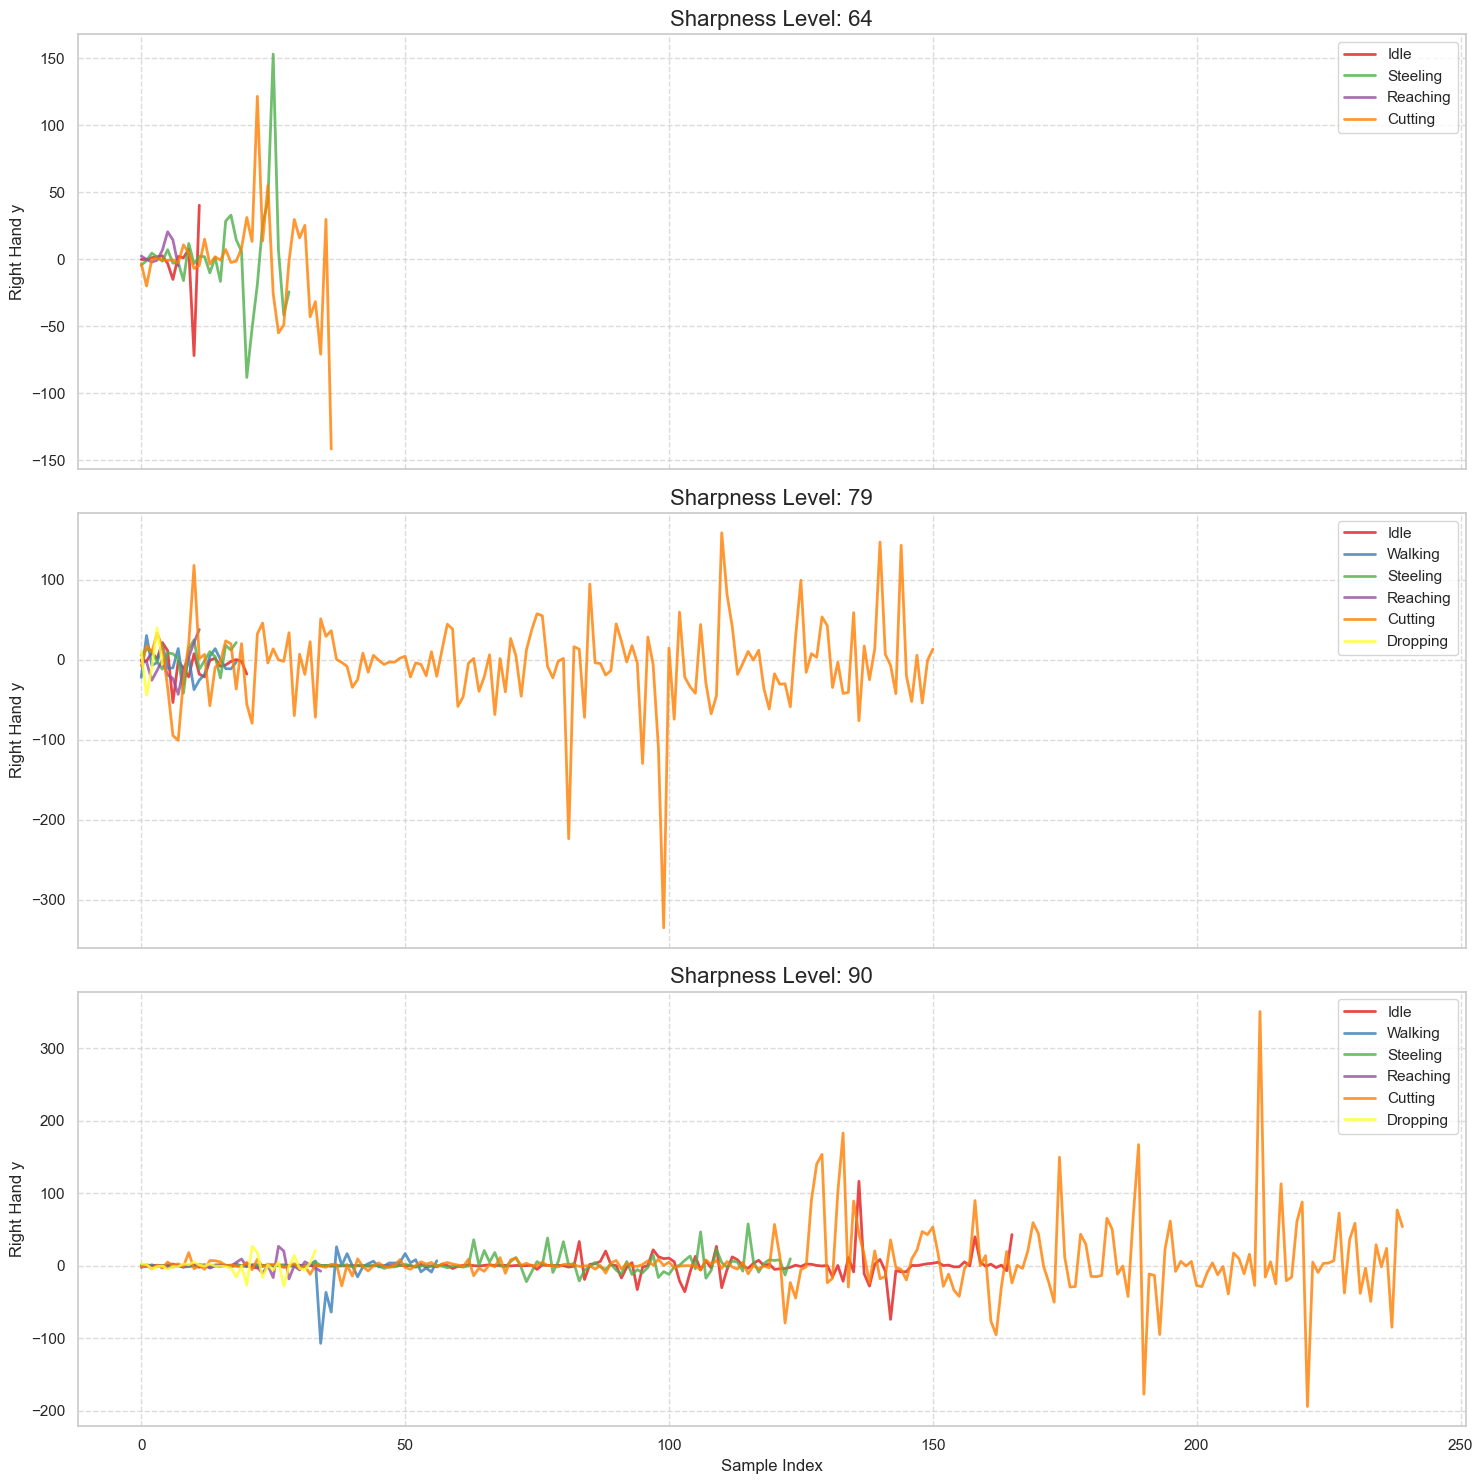

In [14]:
create_facet_plots(
    df,
    value_column='Right Hand y',
    downsample_factor=70
)

In [15]:
# df.columns.tolist()

# **DATA splitting (Activity Recognition)**

In [16]:
import tensorflow as tf
from keras import layers

train_dataset = df.sample(frac=0.8, random_state=42)
test_dataset = df.drop(train_dataset.index)

numeric_cols = df.select_dtypes(include=['int', 'int64', 'float', 'float64']).columns.tolist()

train_features = train_dataset[numeric_cols].copy()
test_features = test_dataset[numeric_cols].copy()

train_labels = train_features.pop('Label')
test_labels = test_features.pop('Label')

# **Pipeline implementation**

In [17]:
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, RobustScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, initializers
from collections import Counter

train_features['combined_target'] = train_labels.astype(str) + '_' + train_features['sharpness'].astype(str)

combined_target = train_features['combined_target'].copy()
train_features_for_sampling = train_features.drop(['combined_target'], axis=1)

categorical_features = [
    train_features_for_sampling.columns.get_loc(col)
    for col in train_features_for_sampling.columns if col in ['Label', 'sharpness']
]

class_counts = Counter(combined_target)
print("Original distribution:", class_counts)

majority_class_count = max(class_counts.values())

sampling_strategy = {
    label_sharpness: majority_class_count for label_sharpness in class_counts.keys()
}

Original distribution: Counter({'4_90': 13540, '0_90': 9245, '4_79': 8497, '2_90': 6864, '1_90': 3119, '4_64': 2067, '3_90': 1943, '5_90': 1847, '2_64': 1551, '0_79': 1166, '2_79': 1044, '1_79': 1011, '3_79': 639, '0_64': 613, '3_64': 463, '5_79': 274})


In [18]:
smote_nc = SMOTENC(
    categorical_features=categorical_features,
    sampling_strategy=sampling_strategy,
    random_state=42,
    k_neighbors=10
)

In [19]:
# Fit and resample
X_resampled, y_resampled = smote_nc.fit_resample(
    train_features_for_sampling.values, 
    combined_target.values
)

In [20]:
y_resampled = np.array([label.split('_')[0] for label in y_resampled], dtype=int)

In [21]:
# Step 4: Convert back to dataframe and split combined target
# Create a dataframe with the resampled features
resampled_df = pd.DataFrame(
    X_resampled, 
    columns=train_features_for_sampling.columns
)

resampled_df['Label'] = y_resampled
# resampled_df['Label'] = resampled_df['combined_label'].str.split('_').str[0].astype(int)
# resampled_df = resampled_df.drop('combined_label', axis=1)

resampled_df['Label'].unique()

array([4, 1, 2, 0, 3, 5])

In [22]:
print(np.unique(y_resampled))

[0 1 2 3 4 5]


In [23]:
# Check the class distribution after resampling
unique_values, counts = np.unique(y_resampled, return_counts=True)
class_distribution = dict(zip(unique_values, counts))
print("\nClass distribution after SMOTE:")
for class_value, count in sorted(class_distribution.items()):
    print(f"activity label {class_value}: {count} samples")


Class distribution after SMOTE:
activity label 0: 40620 samples
activity label 1: 27080 samples
activity label 2: 40620 samples
activity label 3: 40620 samples
activity label 4: 40620 samples
activity label 5: 27080 samples


In [24]:
# # adding the oversampled columns back to a dataframe for visualization
# resampled_df = pd.DataFrame(X_resampled, columns=train_features.columns.tolist())
# resampled_df['Label'] = y_resampled

# resampled_df.shape

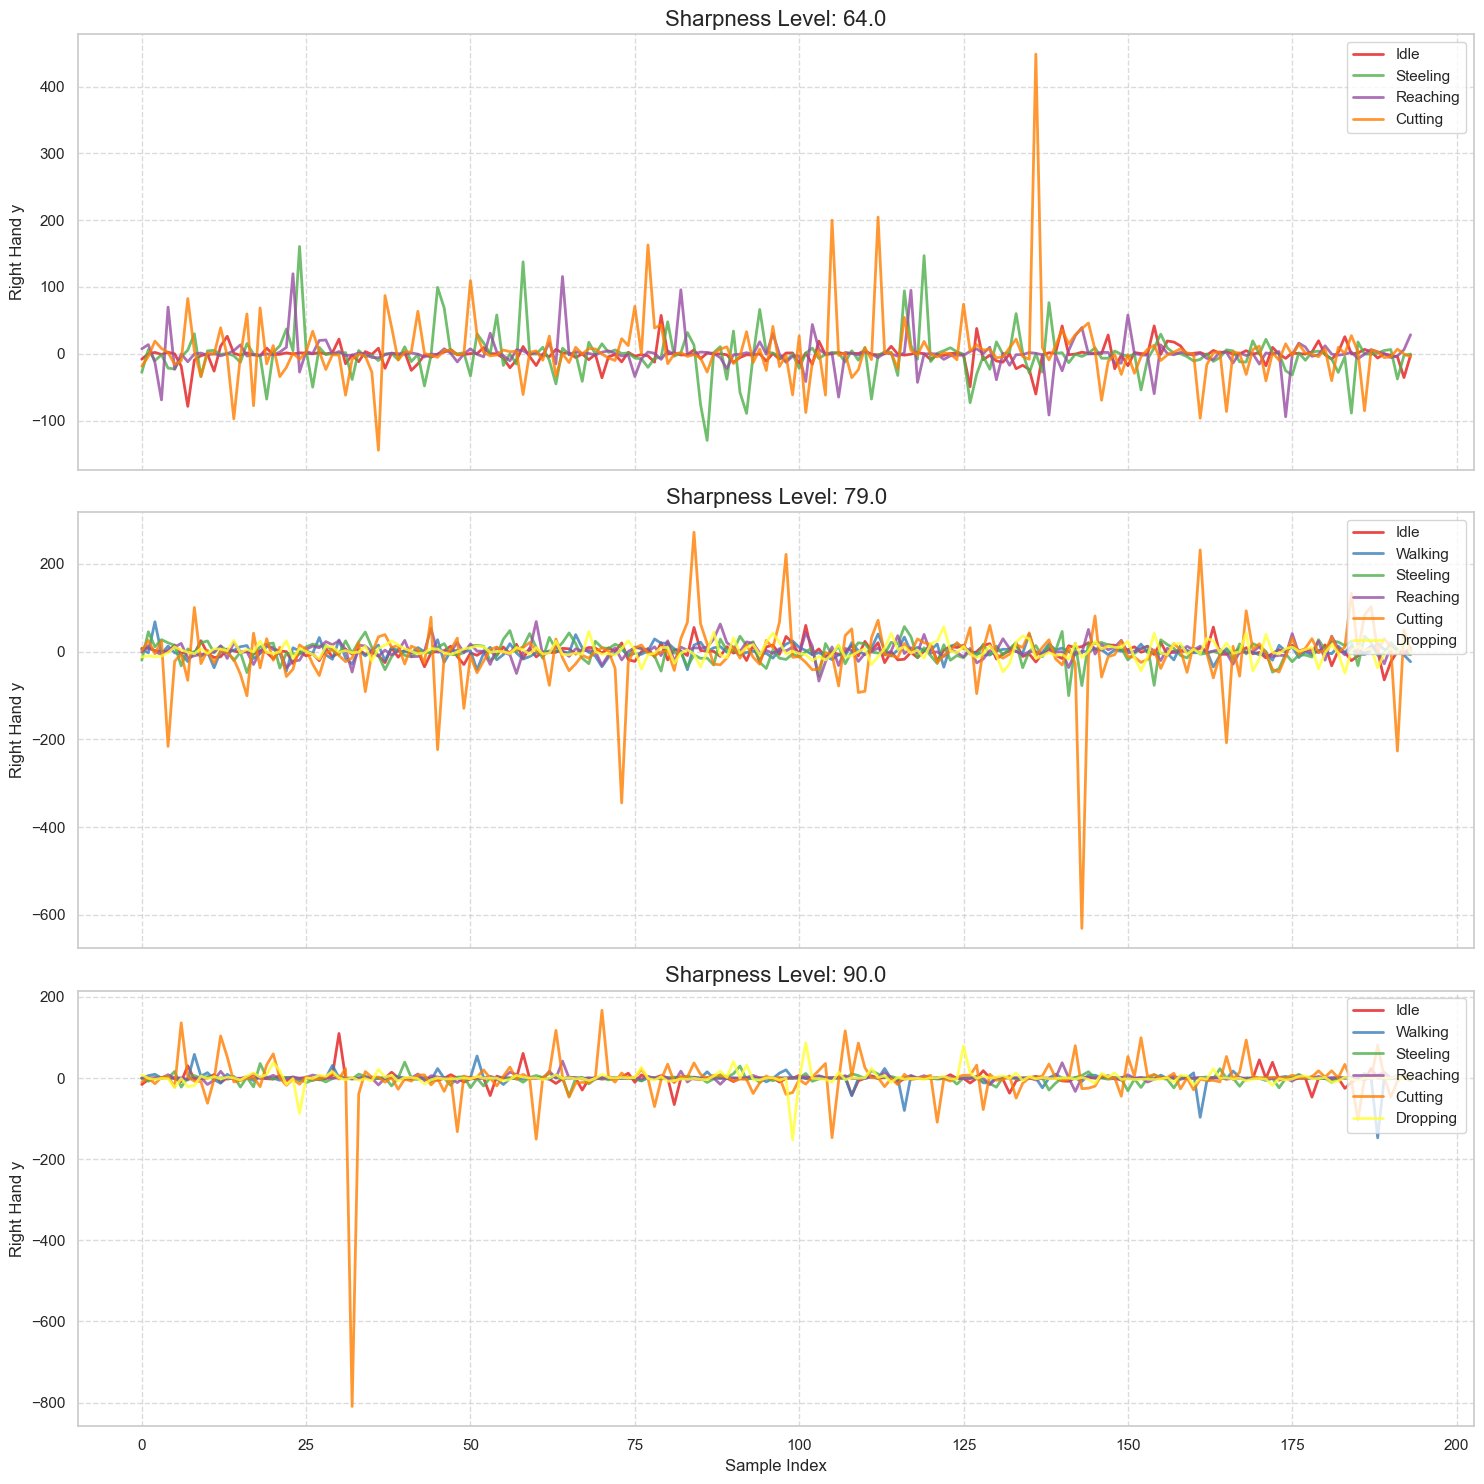

In [25]:
create_facet_plots(
    resampled_df,
    value_column='Right Hand y',
    downsample_factor=70
)

In [26]:
normalizer = layers.Normalization(axis=-1)
normalizer.adapt(X_resampled)

X_train_processed = normalizer(X_resampled).numpy()
X_test_processed = normalizer(test_features.values).numpy()
y_train_processed = y_resampled

# check the normalized data
print(f"Min value in normalized data: {X_train_processed.min()}")
print(f"Max value in normalized data: {X_train_processed.max()}")
print(f"Mean value in normalized data: {X_train_processed.mean()}")
print(f"Standard deviation in normalized data: {X_train_processed.std()}")

Min value in normalized data: -49.499595642089844
Max value in normalized data: 53.50795364379883
Mean value in normalized data: 3.6357755694993443e-10
Standard deviation in normalized data: 0.9999998807907104


### **Model**

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_processed, y_train_processed)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [28]:
# make predictions on the test set

predictions = rf_model.predict(X_test_processed)

In [29]:
test_labels = np.array(test_labels, dtype=int)
predictions = np.array(predictions, dtype=int)

print(f"Classificaton report: ")
print(classification_report(test_labels, predictions))

Classificaton report: 
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      2808
           1       0.76      0.91      0.82      1082
           2       0.84      0.76      0.80      2480
           3       0.68      0.70      0.69       737
           4       0.86      0.93      0.89      5801
           5       0.76      0.67      0.71       563

    accuracy                           0.85     13471
   macro avg       0.80      0.80      0.80     13471
weighted avg       0.85      0.85      0.85     13471



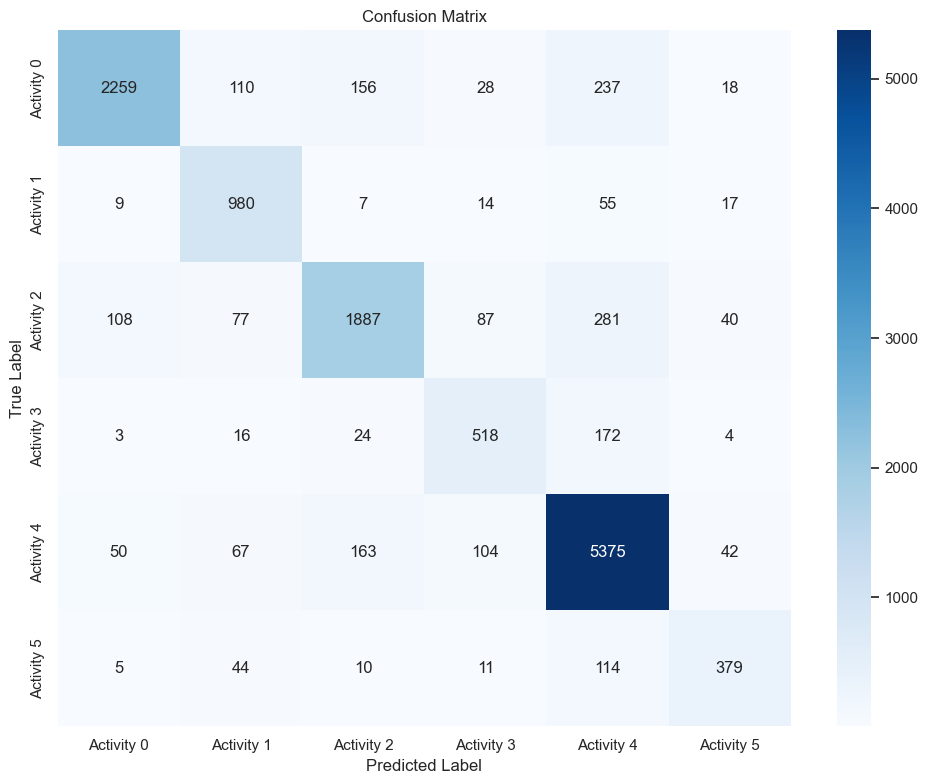

In [30]:
# Create the confusion matrix
cm = confusion_matrix(test_labels, predictions)

# Get unique class labels
unique_classes = np.sort(np.unique(np.concatenate([test_labels, predictions])))
class_labels = [f'Activity {val}' for val in unique_classes]

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, 
            yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# **Feature Evaluation**

In [31]:
from sklearn.feature_selection import mutual_info_classif

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns = [col for col in numerical_columns if col not in ['Label', 'Sharpness']]
X = df[numerical_columns]
y_label = df['Label']

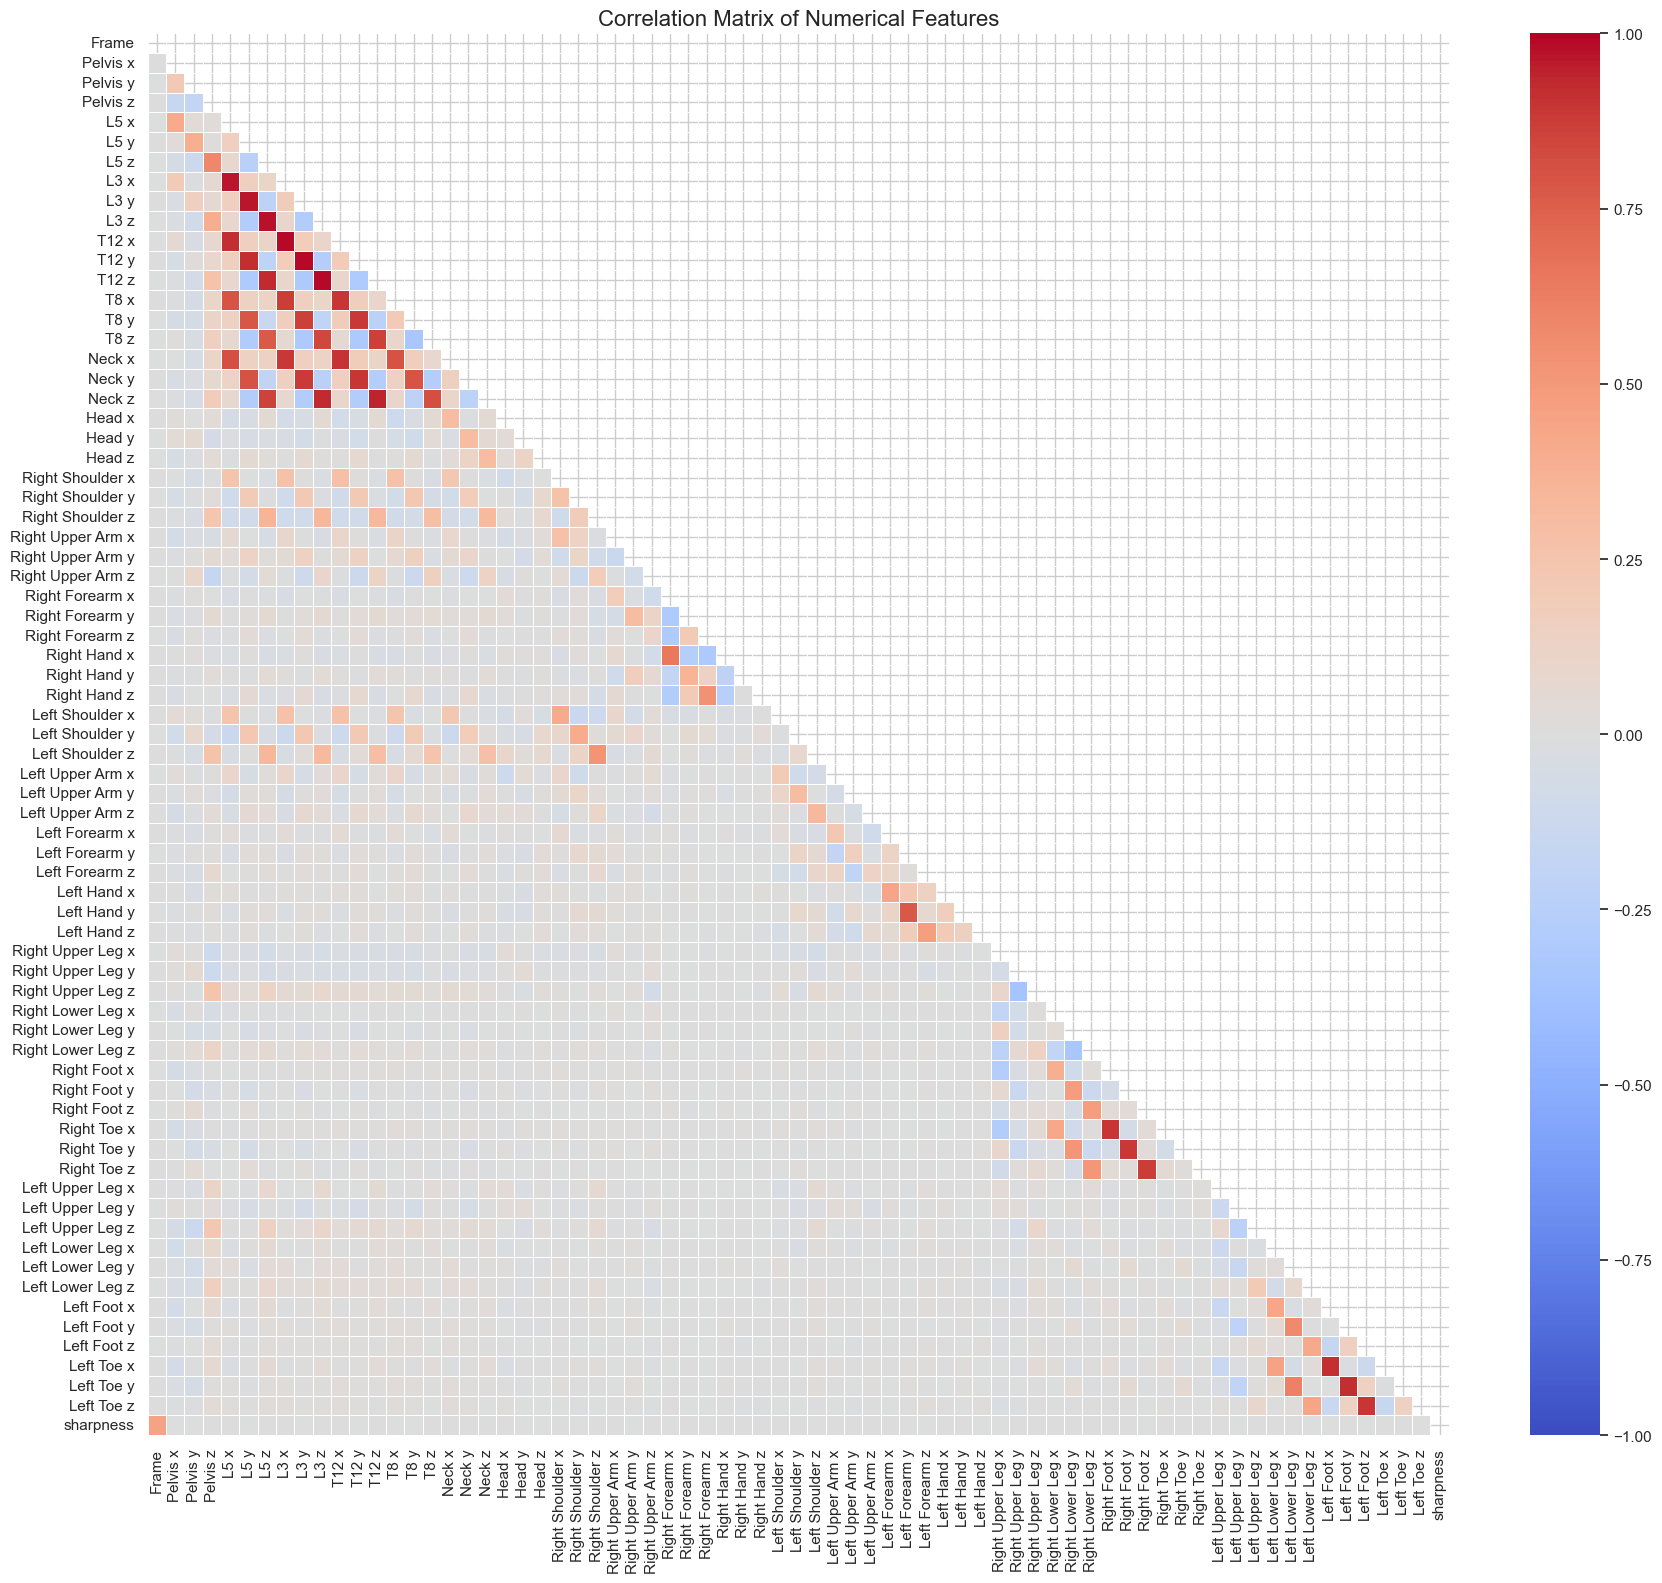

Features with correlation above 0.7:
L3 x and L5 x: 0.968
L3 y and L5 y: 0.966
L3 z and L5 z: 0.973
T12 x and L5 x: 0.919
T12 x and L3 x: 0.989
T12 y and L5 y: 0.915
T12 y and L3 y: 0.988
T12 z and L5 z: 0.928
T12 z and L3 z: 0.989
T8 x and L5 x: 0.794
T8 x and L3 x: 0.872
T8 x and T12 x: 0.892
T8 y and L5 y: 0.782
T8 y and L3 y: 0.863
T8 y and T12 y: 0.883
T8 z and L5 z: 0.772
T8 z and L3 z: 0.842
T8 z and T12 z: 0.863
Neck x and L5 x: 0.806
Neck x and L3 x: 0.883
Neck x and T12 x: 0.903
Neck x and T8 x: 0.802
Neck y and L5 y: 0.803
Neck y and L3 y: 0.880
Neck y and T12 y: 0.897
Neck y and T8 y: 0.797
Neck z and L5 z: 0.853
Neck z and L3 z: 0.923
Neck z and T12 z: 0.942
Neck z and T8 z: 0.816
Left Hand y and Left Forearm y: 0.778
Right Toe x and Right Foot x: 0.893
Right Toe y and Right Foot y: 0.885
Right Toe z and Right Foot z: 0.873
Left Toe x and Left Foot x: 0.910
Left Toe y and Left Foot y: 0.920
Left Toe z and Left Foot z: 0.898


In [32]:
correlation_matrix = df[numerical_columns].corr()

# Plot heatmap with optimized visualization
plt.figure(figsize=(18, 16))
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='coolwarm', 
            vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

# Identify highly correlated features (useful for feature selection)
high_corr_threshold = 0.7
high_corr_features = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > high_corr_threshold:
            high_corr_features.append((correlation_matrix.columns[i], 
                                      correlation_matrix.columns[j], 
                                      correlation_matrix.iloc[i, j]))

print(f"Features with correlation above {high_corr_threshold}:")
for feat1, feat2, corr in high_corr_features:
    print(f"{feat1} and {feat2}: {corr:.3f}")

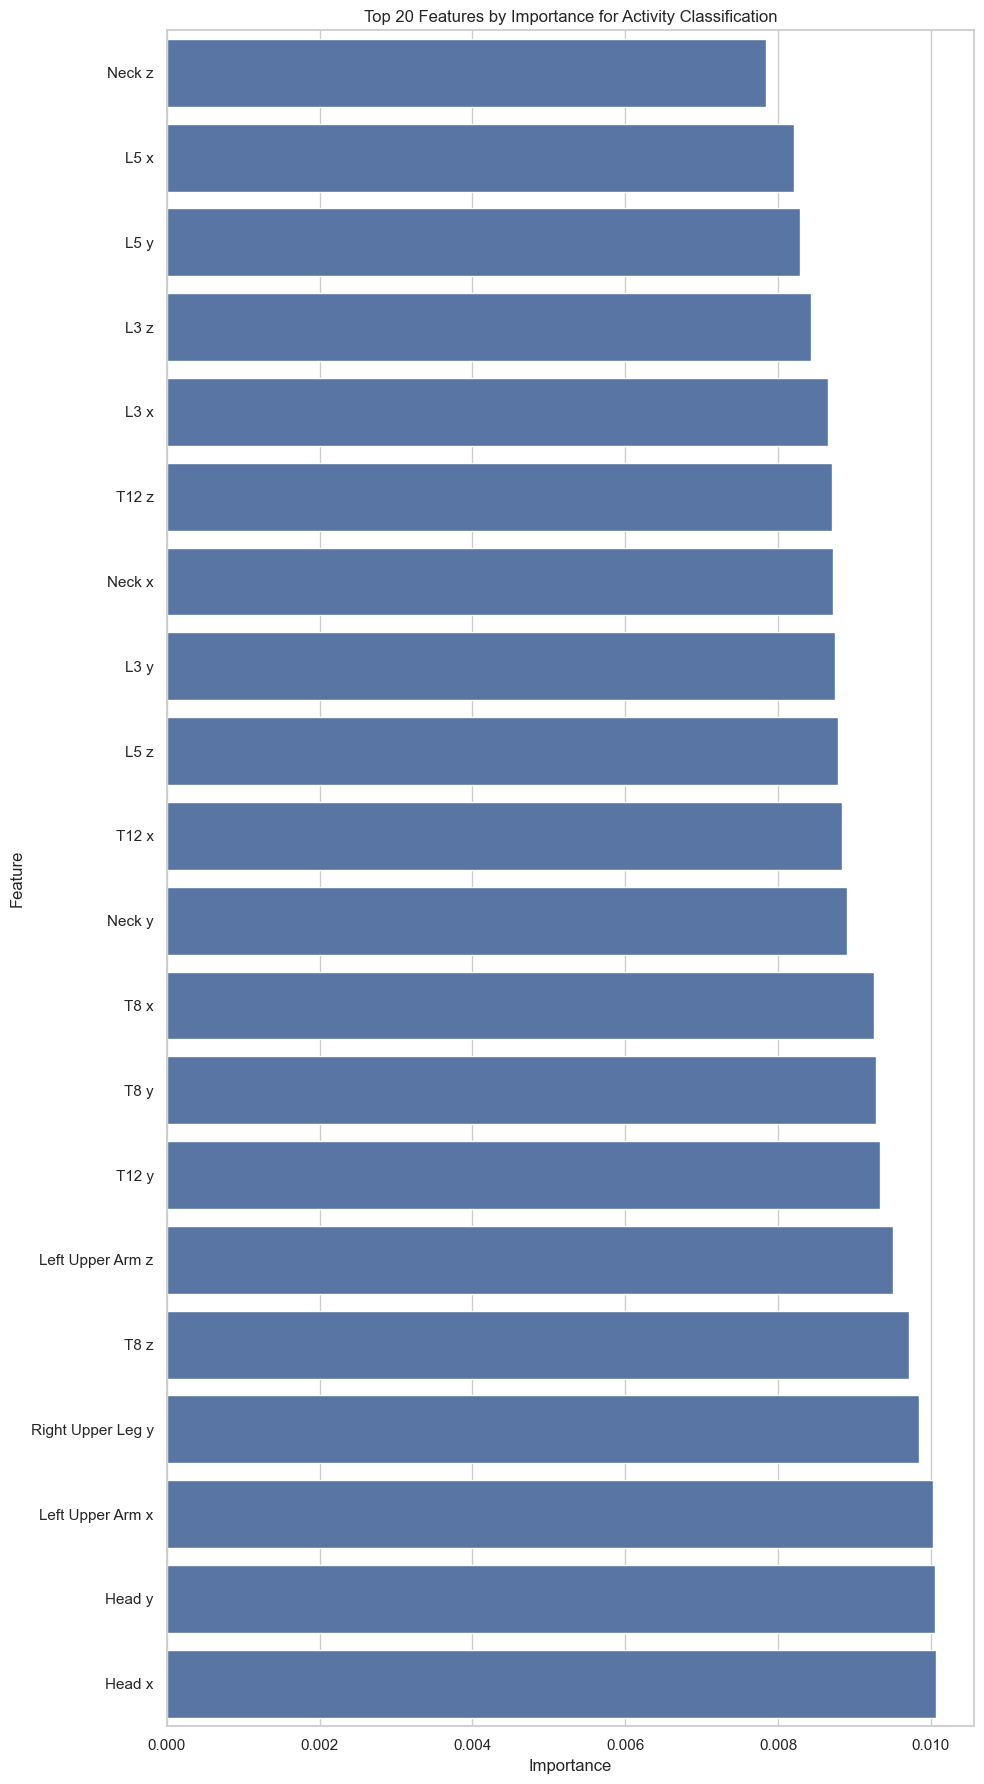

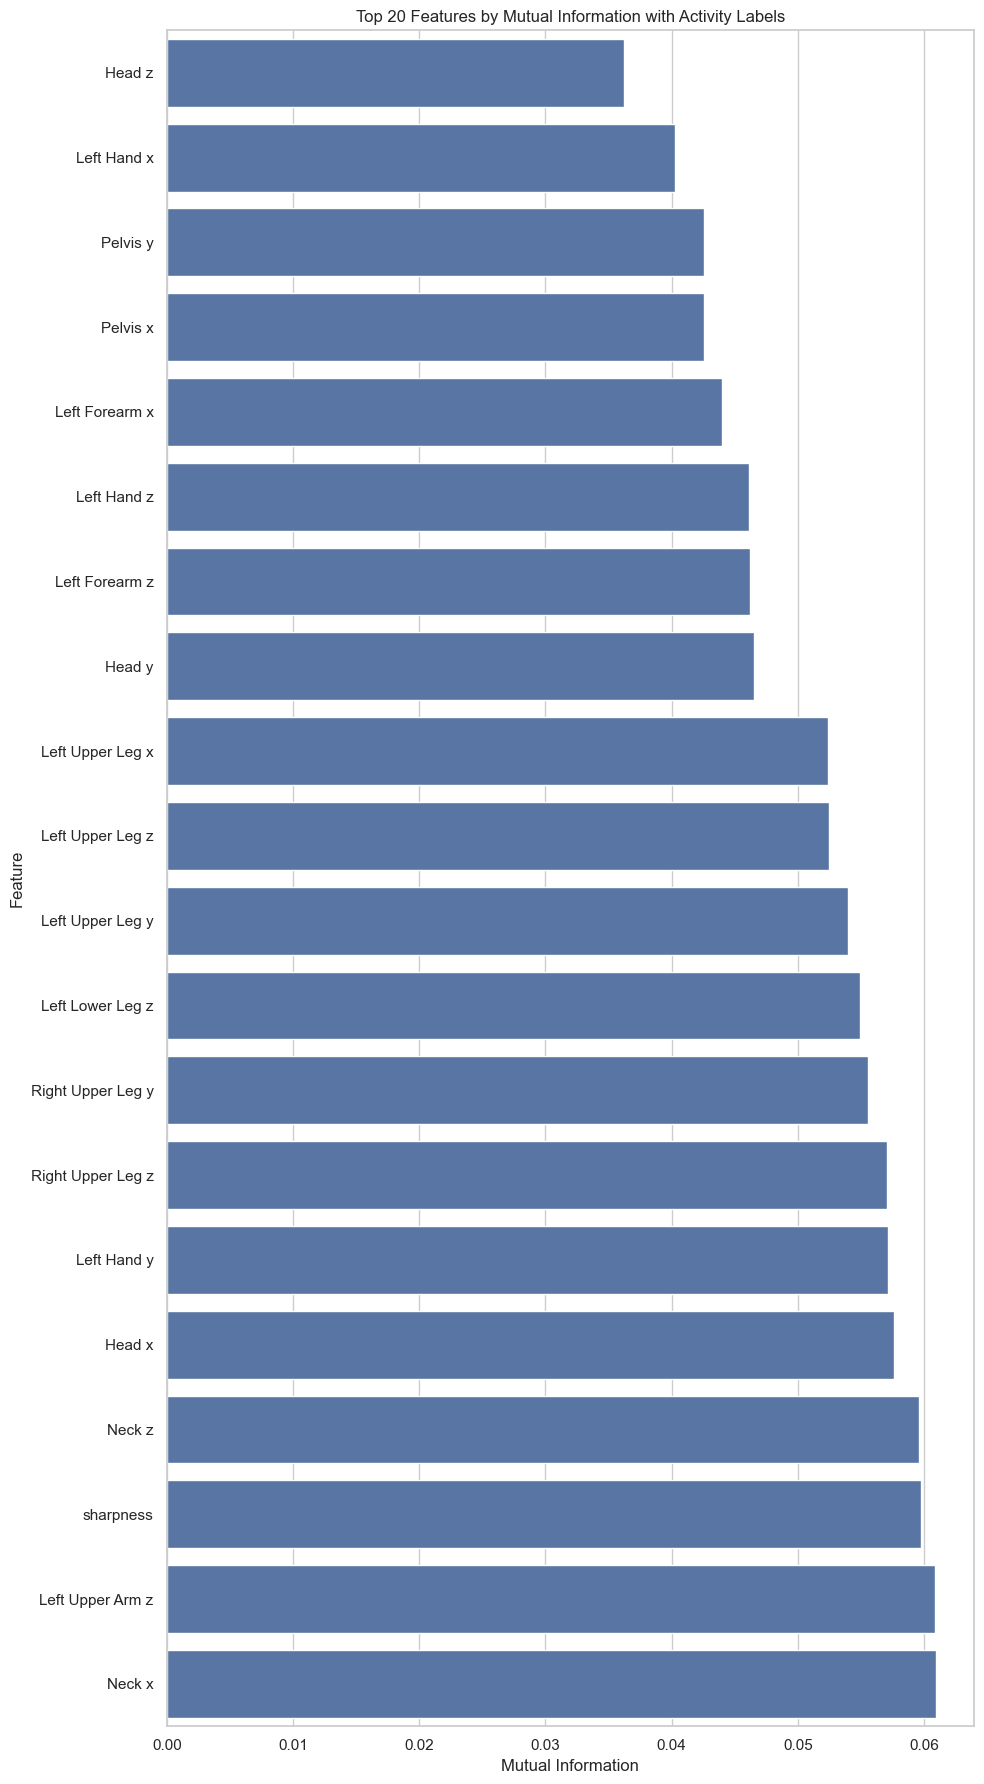

In [33]:
# features importance against activity labels

rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X, y_label)

# Get feature importances
importances = rf.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': numerical_columns,
    'Importance': importances
}).sort_values('Importance', ascending=True)

plt.figure(figsize=(10, 18))
sns.barplot(data=feature_importance.head(20), x='Importance', y='Feature')
plt.title('Top 20 Features by Importance for Activity Classification')
plt.tight_layout()
plt.show()

# 2.2 Mutual Information (more robust for non-linear relationships)
mi_scores = mutual_info_classif(X, y_label)
mi_feature_importance = pd.DataFrame({
    'Feature': numerical_columns,
    'Mutual Information': mi_scores
}).sort_values('Mutual Information', ascending=True)

plt.figure(figsize=(10, 18))
sns.barplot(data=mi_feature_importance.head(20), x='Mutual Information', y='Feature')
plt.title('Top 20 Features by Mutual Information with Activity Labels')
plt.tight_layout()
plt.show()

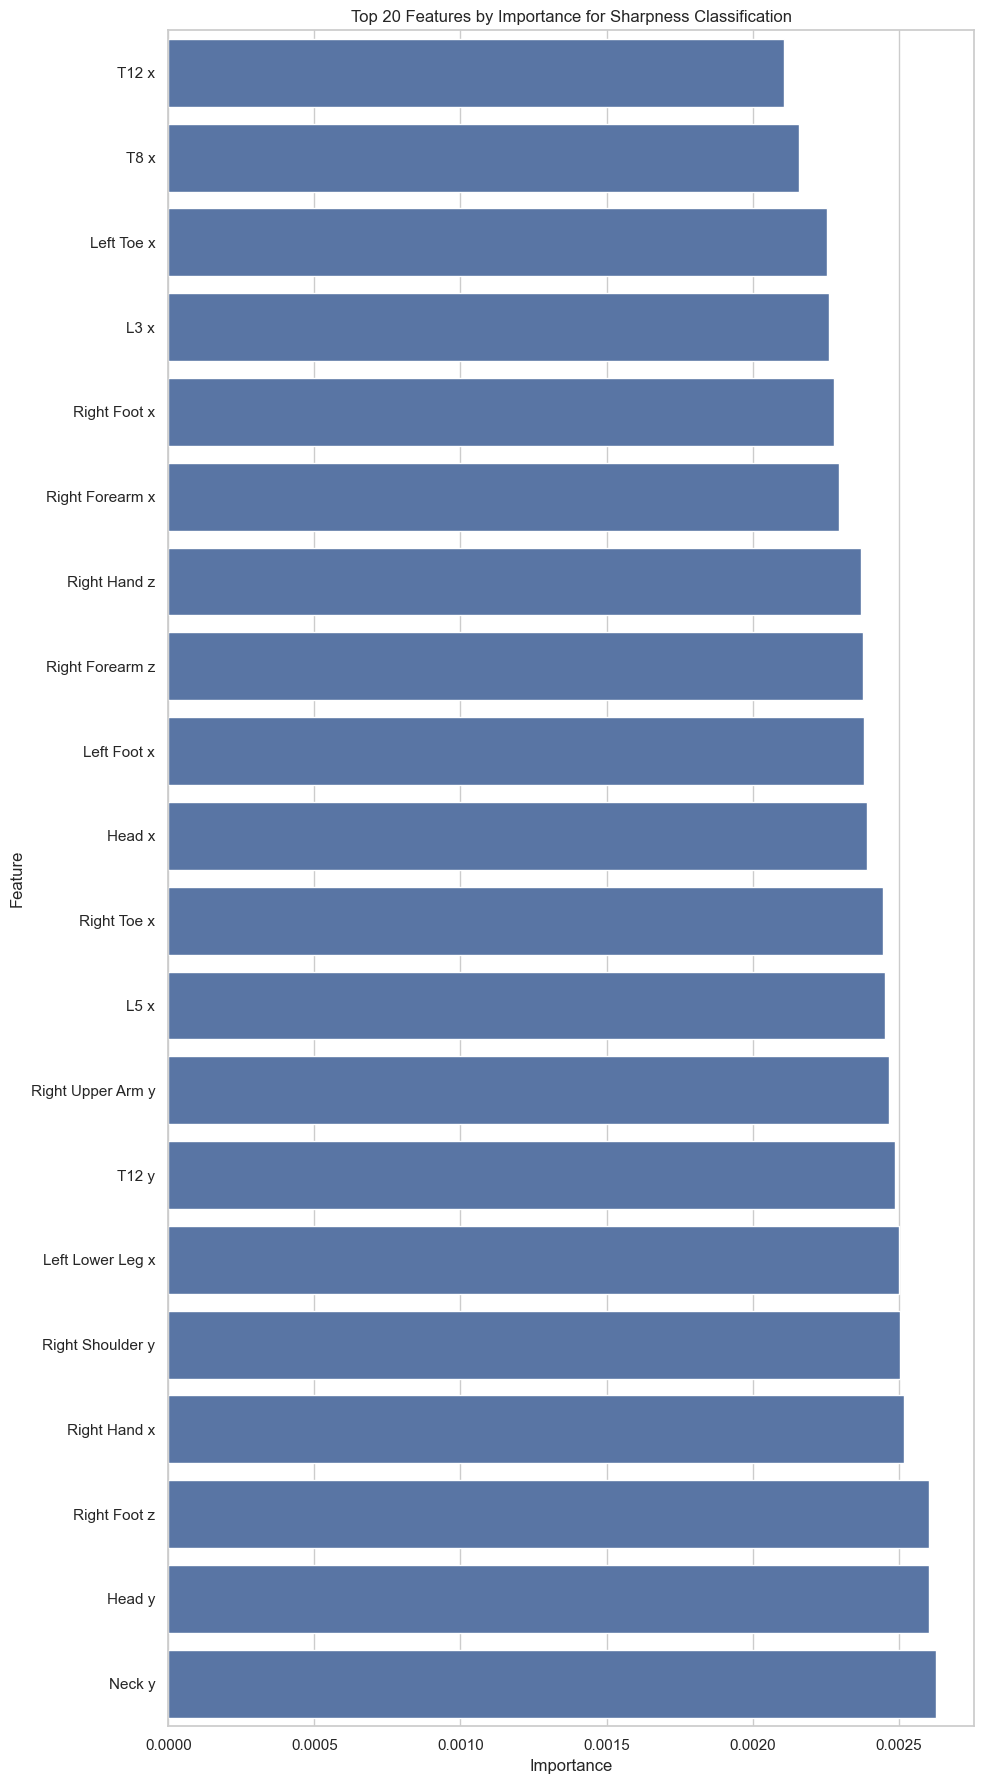

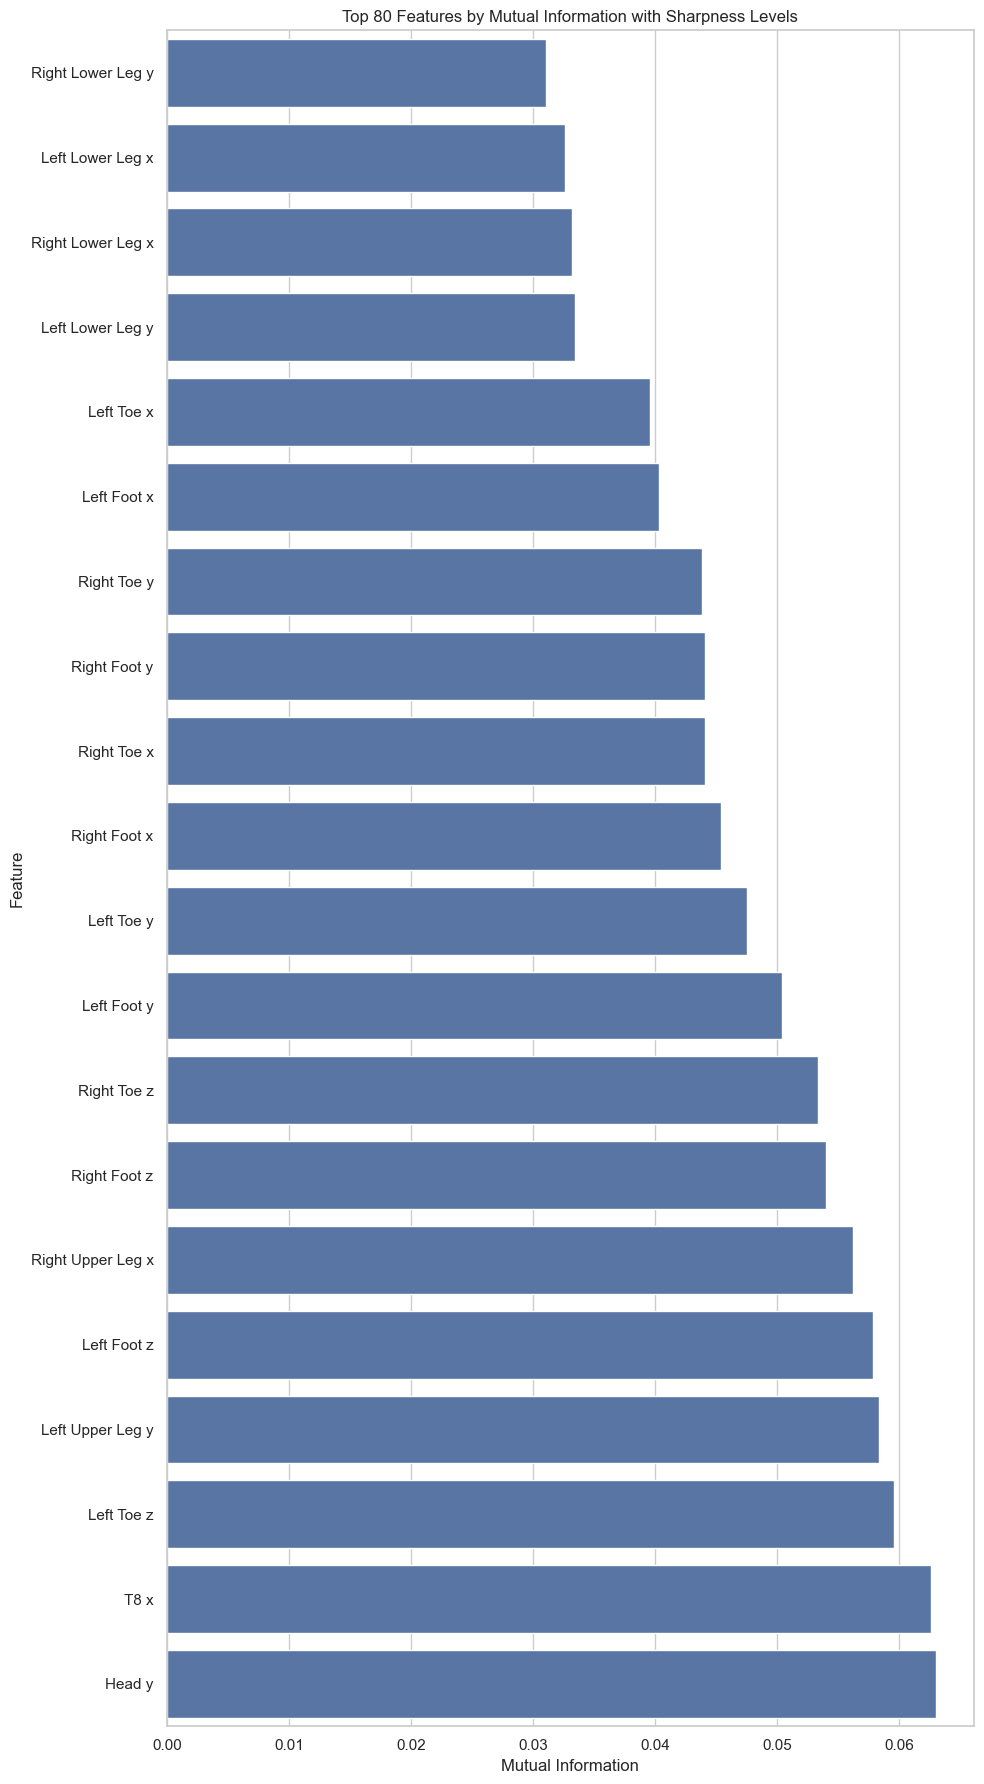

In [34]:
# Similar analysis for Sharpness
y_sharpness = df['sharpness']

# Train a random forest classifier for sharpness
rf_sharpness = RandomForestClassifier(n_estimators=50, random_state=42)
rf_sharpness.fit(X, y_sharpness)

# Get feature importances for sharpness prediction
importances_sharpness = rf_sharpness.feature_importances_
feature_importance_sharpness = pd.DataFrame({
    'Feature': numerical_columns,
    'Importance': importances_sharpness
}).sort_values('Importance', ascending=True)

plt.figure(figsize=(10, 18))
sns.barplot(data=feature_importance_sharpness.head(20), x='Importance', y='Feature')
plt.title('Top 20 Features by Importance for Sharpness Classification')
plt.tight_layout()
plt.show()

# Mutual Information for sharpness
mi_scores_sharpness = mutual_info_classif(X, y_sharpness)
mi_feature_importance_sharpness = pd.DataFrame({
    'Feature': numerical_columns,
    'Mutual Information': mi_scores_sharpness
}).sort_values('Mutual Information', ascending=True)

plt.figure(figsize=(10, 18))
sns.barplot(data=mi_feature_importance_sharpness.head(20), x='Mutual Information', y='Feature')
plt.title('Top 80 Features by Mutual Information with Sharpness Levels')
plt.tight_layout()
plt.show()

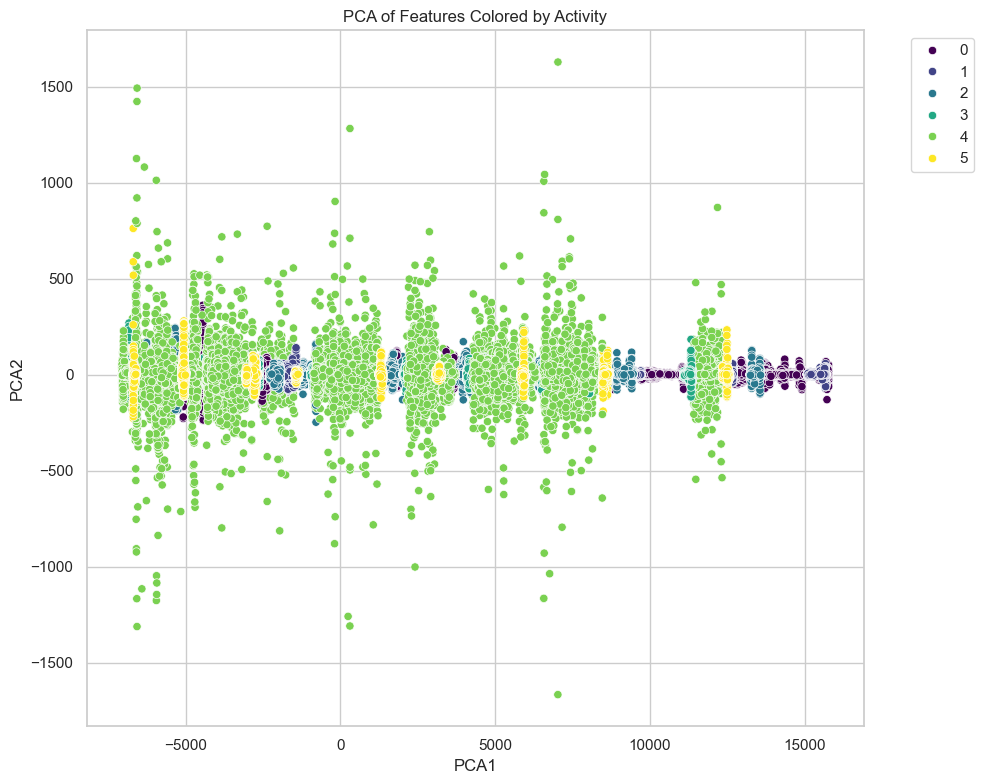

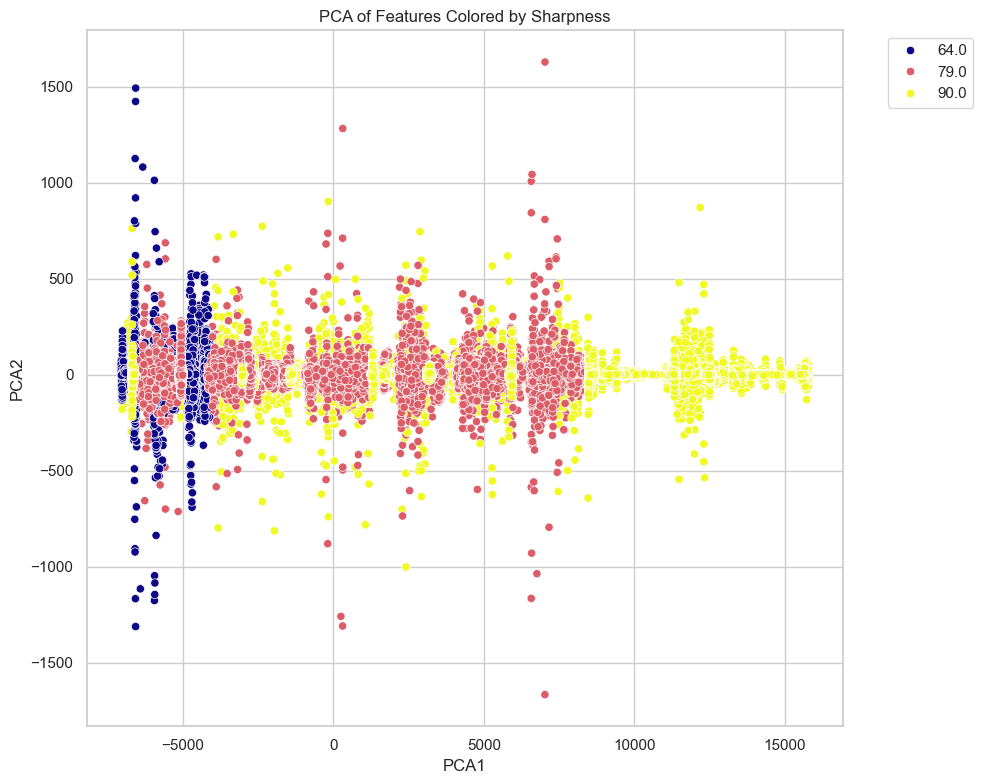

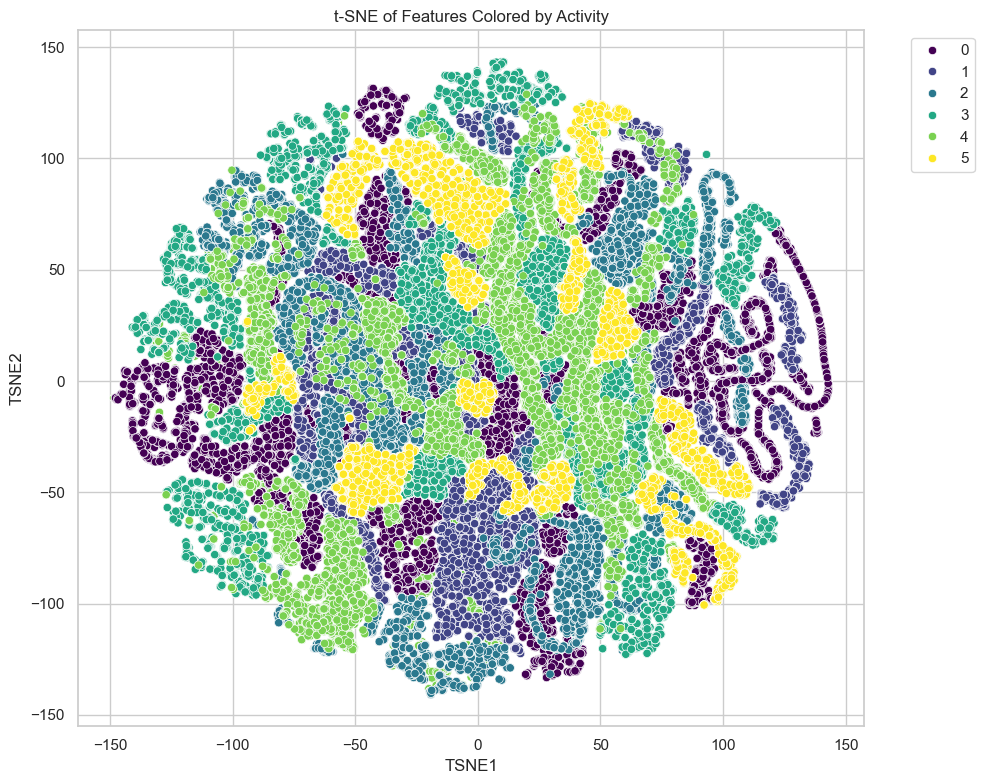

In [35]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# PCA for dimensionality reduction
def plot_PCA_and_tNSE(df):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(df[numerical_columns])
    
    # Create a DataFrame for plotting
    pca_df = pd.DataFrame({
        'PCA1': pca_result[:, 0],
        'PCA2': pca_result[:, 1],
        'Activity': df['Label'],
        'Sharpness': df['sharpness']
    })
    
    # Plot PCA by Activity
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Activity', palette='viridis')
    plt.title('PCA of Features Colored by Activity')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
    # Plot PCA by Sharpness
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Sharpness', palette='plasma')
    plt.title('PCA of Features Colored by Sharpness')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
    # Bonus: t-SNE for better visualization of complex relationships
    tsne = TSNE(n_components=2, random_state=42)
    tsne_result = tsne.fit_transform(df[numerical_columns])
    
    tsne_df = pd.DataFrame({
        'TSNE1': tsne_result[:, 0],
        'TSNE2': tsne_result[:, 1],
        'Activity': df['Label'],
        'Sharpness': df['sharpness']
    })
    
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Activity', palette='viridis')
    plt.title('t-SNE of Features Colored by Activity')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

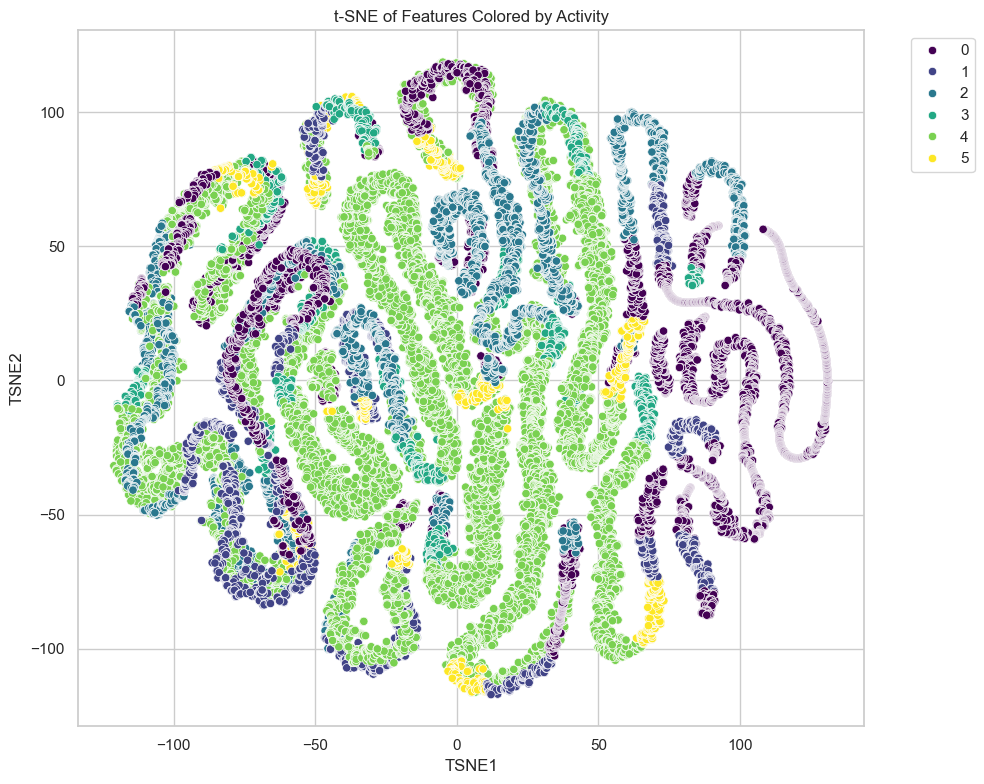

In [36]:
# Bonus: t-SNE for better visualization of complex relationships
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(df[numerical_columns])

tsne_df = pd.DataFrame({
    'TSNE1': tsne_result[:, 0],
    'TSNE2': tsne_result[:, 1],
    'Activity': df['Label']
    # 'Sharpness': df['sharpness']
})

plt.figure(figsize=(10, 8))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Activity', palette='viridis')
plt.title('t-SNE of Features Colored by Activity')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# **Dimensionality Reduction**

In [40]:
def correlation_based_selection(df, threshold=0.8):
    """
    Remove highly correlated features using a correlation threshold.
    
    Args:
        df: DataFrame containing features
        threshold: Correlation threshold above which to remove features
        
    Returns:
        List of features to keep
    """
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # Identify features to remove
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    # Features to keep
    to_keep = [column for column in df.columns if column not in to_drop]
    
    return to_keep

def hybrid_dimensionality_reduction(df, target='Label', n_features=30):
    """
    """
    low_corr_features = correlation_based_selection(df.drop(columns=[target]), threshold=0.85)

    X = df[low_corr_features]
    y = df[target]

    mi_scores = mutual_info_classif(X, y)
    mi_features = pd.DataFrame({'feature': low_corr_features, 'importance': mi_scores})

    anatomical_groups = {
        'spine': [col for col in low_corr_features if any(x in col for x in ['Pelvis', 'L5', 'L3', 'T12', 'T8', 'Neck'])],
        'head': [col for col in low_corr_features if 'Head' in col],
        'right_arm': [col for col in low_corr_features if any(x in col for x in ['Right_Shoulder', 'Right_Upper_Arm', 'Right_Forearm', 'Right_Hand'])],
        'left_arm': [col for col in low_corr_features if any(x in col for x in ['Left_Shoulder', 'Left_Upper_Arm', 'Left_Forearm', 'Left_Hand'])],
        'right_leg': [col for col in low_corr_features if any(x in col for x in ['Right_Upper_Leg', 'Right_Lower_Leg', 'Right_Foot', 'Right_Toe'])],
        'left_leg': [col for col in low_corr_features if any(x in col for x in ['Left_Upper_Leg', 'Left_Lower_Leg', 'Left_Foot', 'Left_Toe'])],
    }

    must_include = []
    for group, features in anatomical_groups.items():
        if features:
            group_features = mi_features[mi_features['feature'].isin(features)]
            if not group_features.empty:
                top_feature = group_features.iloc[0]['feature']
                must_include.append(top_feature)

    top_by_mi = mi_features[~mi_features['feature'].isin(must_include)]['feature'].tolist()
    selected = must_include + top_by_mi[:n_features - len(must_include)]

    return selected[:n_features]

In [44]:
selected_features = hybrid_dimensionality_reduction(resampled_df, target='Label', n_features=50)

In [45]:
print(f"Selected {len(selected_features)} features:")
for i, feature in enumerate(selected_features):
    print(f"{i+1}. {feature}")

Selected 50 features:
1. Pelvis x
2. Head x
3. Frame
4. Pelvis y
5. Pelvis z
6. L5 x
7. L5 y
8. L5 z
9. Head y
10. Head z
11. Right Shoulder x
12. Right Shoulder y
13. Right Shoulder z
14. Right Upper Arm x
15. Right Upper Arm y
16. Right Upper Arm z
17. Right Forearm x
18. Right Forearm y
19. Right Forearm z
20. Right Hand x
21. Right Hand y
22. Right Hand z
23. Left Shoulder x
24. Left Shoulder y
25. Left Shoulder z
26. Left Upper Arm x
27. Left Upper Arm y
28. Left Upper Arm z
29. Left Forearm x
30. Left Forearm y
31. Left Forearm z
32. Left Hand x
33. Left Hand y
34. Left Hand z
35. Right Upper Leg x
36. Right Upper Leg y
37. Right Upper Leg z
38. Right Lower Leg x
39. Right Lower Leg y
40. Right Lower Leg z
41. Right Foot x
42. Right Foot y
43. Right Foot z
44. Left Upper Leg x
45. Left Upper Leg y
46. Left Upper Leg z
47. Left Lower Leg x
48. Left Lower Leg y
49. Left Lower Leg z
50. Left Foot x
